In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/ML Project/LES_RANS

/content/drive/My Drive/ML Project/LES_RANS


In [4]:
ls

'Copy of data_p_time_modelled.csv'    model_p.h5
'Copy of data_ux_time_modelled.csv'   model_p.json
'Copy of data_uy_time_modelled.csv'   model_uy.h5
'Copy of data_uz_time_modelled.csv'   model_uy.json
 MLP_LES_RANS_p.ipynb                 model_uz.h5
 MLP_LES_RANS_ux.ipynb                model_uz.json
 MLP_LES_RANS_uy.ipynb                Random_Forest_LES_RANS.ipynb
 MLP_LES_RANS_uz.ipynb                RANS_sampling_30.csv
 model.h5                             SVR_LES_RANS.ipynb
 model.json


In [0]:
# Read Features
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID'], axis=1)
# Calculating distance
#X['distance']=np.sqrt(X['ccx']**2+X['ccy']**2+X['ccz']**2)
# Dropping
#X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID','ccz','ccy','ccx'], axis=1)
# Read dependent variable
Y=pd.read_csv('Copy of data_uy_time_modelled.csv')
Y=Y.drop(['cellID'],axis=1)

In [0]:
# Normalizing
#X=preprocessing.scale(X)
#mean = np.mean(X)
#std = np.std(X)
#X =  (X - mean) / std
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle= True, test_size=0.3,random_state=42)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, shuffle= True, random_state=42)
# Scalling
#train_mean = np.mean(X_train)
#train_std = np.std(X_train)
#X_train =  (X_train - train_mean) / train_std
#X_val =  (X_val - train_mean) / train_std
#X_test = (X_test - train_mean) / train_std

scaler = preprocessing.StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_val =scaler.transform(X_val)
X_test =scaler.transform(X_test)

input_dim = X_train.shape[1]
nb_y = y_train.shape[1]

In [7]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
#model.add(Dropout(0.15))
#Hidden Layer2
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.15))
#Hidden Layer3
#model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.15))
#Hidden Layer4
#model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.15))
#Output Layer
model.add(Dense(nb_y))
#sgd=keras.optimizers.SGD(lr=0.000005, momentum=0.9, nesterov=False)
adam=keras.optimizers.Adam(lr=0.000005, beta_1=0.9, beta_2=0.999, amsgrad=False)
#Model

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

#Train
print("Training...")
history=model.fit(X_train, y_train, epochs=200, batch_size=30,validation_data=(X_val, y_val) , verbose=1) #validation_split=0.3

print("Generating test predictions...")





Training...



Train on 402567 samples, validate on 44730 samples
Epoch 1/200





402567/402567 [==============================] - 16s 40us/step - loss: 0.1418 - acc: 0.4080 - val_loss: 0.0569 - val_acc: 0.6337
Epoch 2/200
402567/402567 [==============================] - 17s 41us/step - loss: 0.0395 - acc: 0.6835 - val_loss: 0.0275 - val_acc: 0.7031
Epoch 3/200
402567/402567 [==============================] - 16s 39us/step - loss: 0.0225 - acc: 0.6982 - val_loss: 0.0185 - val_acc: 0.6926
Epoch 4/200
402567/402567 [==============================] - 16s 39us/step - loss: 0.0169 - acc: 0.6915 - val_loss: 0.0153 - val_acc: 0.6848
Epoch 5/200
402567/402567 [==============================] - 16s 40us/step - loss: 0.0146 - acc: 0.6864 - val_loss: 0.0138 - val_acc: 0.6836
Epoch 6/200
402567/402567 [==============================] - 16s 39us/step - loss: 0.0135 - acc: 0.6878 - val_loss: 0.0129 - val_acc: 0.6867
Epoch 7/200
402567/402567 [==============================] - 16s 39us/step - lo

191699/191699 [==============================] - 2s 11us/step
Test Accuracy: [0.006757106381995746, 0.773295632738171]


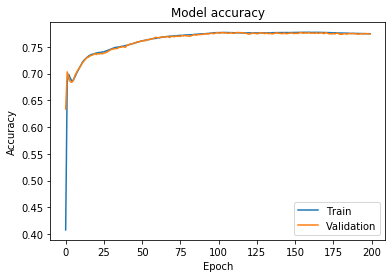

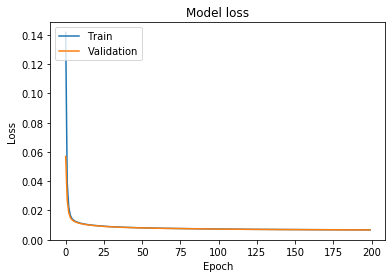

In [8]:
score = model.evaluate(X_test, y_test, batch_size=50)
print('Test Accuracy: {}'.format(score))
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("model_uy.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_uy.h5")
print("Saved model to disk")
 
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
## load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
